# Parkinson's Disease Detection Using Machine Learning

## 1. Importing Essential Libraries 

In [30]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## 2. Data Preparation

### 2.1 Define Data Directories and Categories

In [31]:
data_dirs = ['../data/spiral/training', 
             '../data/wave/training']
categories=['healthy','parkinson']
image_size=128
data=[]
labels=[]

### 2.2 Load and Preprocess Images

In [32]:
for data_dir in data_dirs:
    for category in categories:
        path = os.path.join(data_dir, category)
        
        if not os.path.exists(path):
            print(f"Warning: Directory {path} does not exist. Skipping...")
            continue
        
        class_label = categories.index(category)
        
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0 ##scalling
                data.append(img)
                labels.append(class_label)
            except Exception as e:
                print(f'Error loading image {img_name}: {e}')

### 2.3 Convert Data to NumPy Arrays

In [33]:
data = np.array(data, dtype="float32").reshape(-1, image_size, image_size, 1)  
labels = np.array(labels)

print("Data shape:", data.shape)
print("Data size:", data.size)

Data shape: (144, 128, 128, 1)
Data size: 2359296


## 3. Train-Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## 4. Building the CNN Model

In [35]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(image_size,image_size,1)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='softmax') #bcz 2 classes only healthy and parkinson
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 5. Training the Model

In [36]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.5014 - loss: 1.5867 - val_accuracy: 0.5172 - val_loss: 0.8309
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.4072 - loss: 1.1343 - val_accuracy: 0.5172 - val_loss: 0.6923
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.5587 - loss: 0.6915 - val_accuracy: 0.4828 - val_loss: 0.6930
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5348 - loss: 0.6935 - val_accuracy: 0.5172 - val_loss: 0.6916
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5208 - loss: 0.6931 - val_accuracy: 0.4828 - val_loss: 0.6940
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.5441 - loss: 0.6888 - val_accuracy: 0.4828 - val_loss: 0.6919
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5490 - loss: 0.6910 - val_accuracy: 0.5517 - val_loss: 0.6930
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6355 - loss: 0.6916 - val_accuracy: 0.5517 - val_loss:

## 6. Visualizing Model Performance

### 6.1 Plot Accuracy

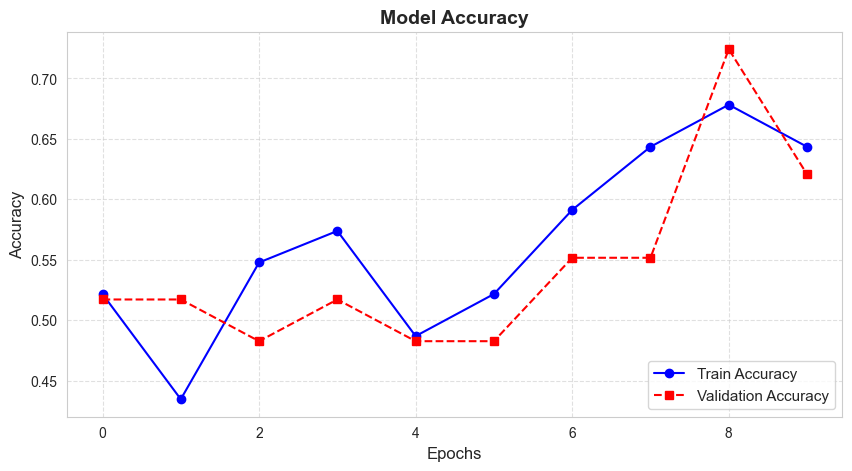

In [37]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))  
plt.plot(history.history['accuracy'], marker='o', linestyle='-', label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], marker='s', linestyle='--', label='Validation Accuracy', color='red')


plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)


plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

### 6.2 Plot Loss

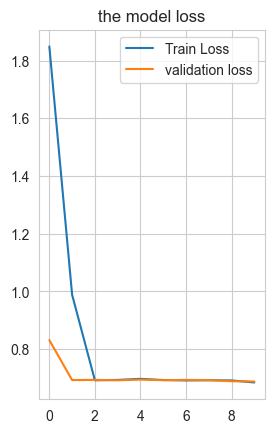

In [38]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.title("the model loss")
plt.show()

## 7. Saving the Model

In [40]:
model.save("../models/parkinson_model_2.h5")
print("Model saved!")

Model saved!


## 8. Testing the Model

### 8.1 Load Test Data and Model

In [41]:
test_dir = "../data/spiral/testing"
categories = ["healthy", "parkinson"]  
image_size = 128  
test_images = []
test_labels = []
predicted_labels = []

model = load_model("../models/parkinson_model_2.h5")  

### 8.2 Process Test Images and Predict

In [42]:
for category in categories:
    path = os.path.join(test_dir, category)
    class_label = categories.index(category)  # 0 for healthy, 1 for parkinson
    
    for img_name in os.listdir(path):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0  
            img = np.expand_dims(img, axis=-1) 
            img = np.expand_dims(img, axis=0)  
           
            test_images.append(img)
            test_labels.append(class_label)
          
            prediction = model.predict(img)
            predicted_class = np.argmax(prediction)  
            predicted_labels.append(predicted_class)

        except Exception as e:
            print(f"Error processing image {img_name}: {e}")

test_labels = np.array(test_labels)
predicted_labels = np.array(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━

### 8.3 Calculate Test Accuracy

In [43]:
accuracy = np.mean(test_labels == predicted_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 73.33%


### 8.4 Visualize Predictions

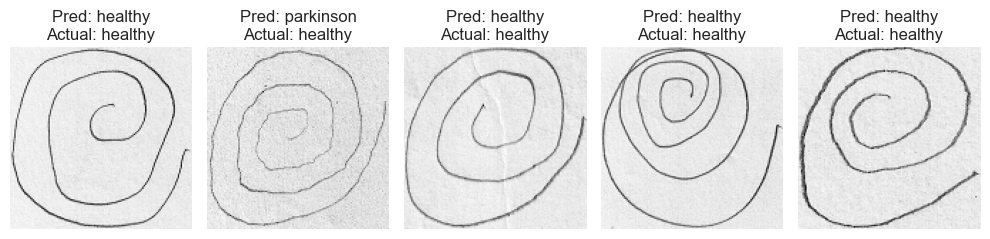

In [44]:
plt.figure(figsize=(10, 5))
for i in range(5): 
    plt.subplot(1, 5, i + 1)
    img = np.squeeze(test_images[i])  
    plt.imshow(img, cmap="gray")
    plt.title(f"Pred: {categories[predicted_labels[i]]}\nActual: {categories[test_labels[i]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

## 9. Model Evaluation Metrics

In [45]:
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.73
Precision: 0.89
Recall: 0.53


## 10. Classification Report

In [46]:
report = classification_report(test_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.93      0.78        15
           1       0.89      0.53      0.67        15

    accuracy                           0.73        30
   macro avg       0.78      0.73      0.72        30
weighted avg       0.78      0.73      0.72        30

